/opt/conda/envs/py310-scoob-env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
INFO:purepyindi2.transports:Connected to localhost:7624


Could not import deepdish!
Could not import ray. Parallelized model unavailble.
/home/derbyk/src/scoob-scc/scoobscc


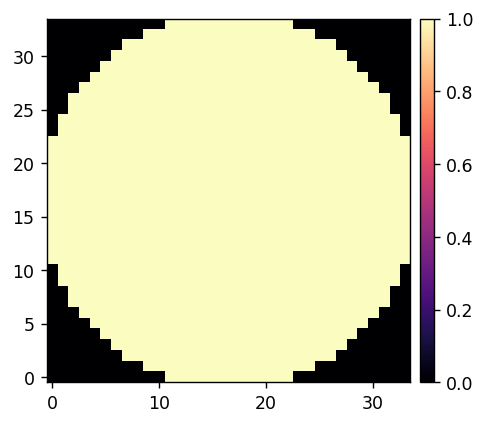

In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize, CenteredNorm
from matplotlib.patches import Circle, Rectangle

import scoobscc
print(scoobscc.path)
data_path = scoobscc.path/'exp-data'

from scoobscc.math_module import xp, xcipy, ensure_np_array
from scoobscc import utils, telem, dm
from scoobscc import iefc
import scoobscc.scoob_interface as scoobi

from magpyx.utils import ImageStream

import purepyindi
from purepyindi import INDIClient
import purepyindi2
from purepyindi2 import IndiClient
client0 = INDIClient('localhost', 7624)
client0.start()
client = IndiClient()
client.connect()
client.get_properties()

wavelength_c = 633e-9
camsci_pxscl = 4.6e-6
camsci_pxscl_lamDc = 0.307

dm_mask = ensure_np_array(dm.make_mask(34))
utils.imshow([dm_mask])

In [2]:
reload(scoobi)
camsci_channel = 'camsci'
dm_ho_channel = 'dm00disp03'

camsci_stream = ImageStream(camsci_channel)
dm_ho_stream = ImageStream(dm_ho_channel)

In [9]:
reload(scoobi)

ncamsci = 256
xc, yc = (5875, 2575)
ncamsci = 512
scoobi.set_cam_roi(xc, yc, ncamsci, client0, cam_name=camsci_channel)
scoobi.set_cam_exp_time(0.005, client0, cam_name=camsci_channel)
scoobi.set_cam_gain(120, client0, cam_name=camsci_channel)
scoobi.set_cam_blacklevel(2, client0, cam_name=camsci_channel)

Set camsci ROI.
Set the camsci exposure time to 5.00e-03s
Set the camsci gain setting to 120.0
Set the camsci blacklevel to 2.0


In [6]:
camsci_stream = ImageStream(camsci_channel)